<a href="https://colab.research.google.com/github/lukebarhoumeh/Thyroid-Gene-Expression-Analysis-with-PCA-and-KPCA/blob/main/Ibrahim_Barhoumeh2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# For splitting data
from sklearn.model_selection import train_test_split

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA as PCA_sklearn
from sklearn.metrics import accuracy_score, precision_score, recall_score

%matplotlib inline


In [2]:
from google.colab import files
uploaded = files.upload()


Saving Thyloid.csv to Thyloid.csv


In [3]:
df = pd.read_csv("Thyloid.csv")

In [4]:
print(df.head())



   hsa-let-7a-1  hsa-let-7a-2  hsa-let-7a-3    hsa-let-7b   hsa-let-7c  \
0  14316.183948  14351.995128  14412.983601  12203.480690  6594.417741   
1  18042.893723  17822.176422  18024.997726   8962.166370  3304.048522   
2  23542.996389  23403.850012  23393.390262  10325.675423  6358.260398   
3  35319.514700  35344.502424  35235.536971   7294.517488  5175.621787   
4  10786.292006  10704.600259  10960.408721   4716.654860  3542.559611   

    hsa-let-7d   hsa-let-7e  hsa-let-7f-1  hsa-let-7f-2   hsa-let-7g  ...  \
0   798.167093  2007.302666   7279.990730   7366.938399   861.970419  ...   
1  3772.327121  4741.693647   5520.915201   5780.407164   472.006932  ...   
2  1129.019119  4283.426272  16578.070468  16638.927197  1227.594343  ...   
3   950.956848  6652.902332  35001.632900  35642.299155  2407.045273  ...   
4  3325.510007  2781.097126   8194.218848   8312.284292  2685.094417  ...   

   hsa-mir-942  hsa-mir-943  hsa-mir-944  hsa-mir-95  hsa-mir-9500  \
0     2.032949     0.0

## PART 1
1.1 Implement PCA FROM Scratch


In [5]:

# 1.1: Implement PCA from Scratch

# 1.1.1: Separate features from the label
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

def pca_from_scratch(X, variance_threshold=0.95):
    """
    Perform PCA on the dataset X to retain a specified amount of variance.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        Input data.
    variance_threshold : float, optional (default=0.95)
        Fraction of variance to retain (e.g., 0.95 => 95%).

    Returns
    -------
    X_reduced : ndarray of shape (n_samples, k)
        The data projected onto the top k principal components,
        where k is chosen to retain 'variance_threshold' fraction of total variance.
    eig_vectors_chosen : ndarray of shape (n_features, k)
        The top k eigenvectors (principal components).
    explained_variance_ratio : ndarray of shape (k,)
        Fraction of variance explained by each of the selected components.
    """

    X_meaned = X - np.mean(X, axis=0)
    cov_matrix = np.cov(X_meaned, rowvar=False)


    eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)


    sorted_indices = np.argsort(eigen_values)[::-1]
    eigen_values = eigen_values[sorted_indices]
    eigen_vectors = eigen_vectors[:, sorted_indices]


    total_variance = np.sum(eigen_values)
    variance_ratio = eigen_values / total_variance
    cumulative_variance = np.cumsum(variance_ratio)
    k = np.argmax(cumulative_variance >= variance_threshold) + 1


    eig_vectors_chosen = eigen_vectors[:, :k]

    # Project data onto these principal components to reduce dimensionality
    X_reduced = np.dot(X_meaned, eig_vectors_chosen)

    explained_variance_ratio = variance_ratio[:k]

    return X_reduced, eig_vectors_chosen, explained_variance_ratio


# Ex Usage

# apply our PCA to the Thyroid dataset, retaining 95% variance
X_reduced, pca_components, var_ratio = pca_from_scratch(X, variance_threshold=0.95)

print("Original shape of X:", X.shape)
print("Reduced shape of X after PCA:", X_reduced.shape)
print("Number of components retained:", pca_components.shape[1])
print("Explained variance ratio of chosen components:", var_ratio)
print("Total variance explained:", np.sum(var_ratio))

Original shape of X: (574, 1881)
Reduced shape of X after PCA: (574, 7)
Number of components retained: 7
Explained variance ratio of chosen components: [0.61808076+5.02302402e-37j 0.14335303+1.16500262e-37j
 0.07793614+6.33372100e-38j 0.05400008+4.38848275e-38j
 0.03427794+2.78570273e-38j 0.02080582+1.69084944e-38j
 0.01781562+1.44784136e-38j]
Total variance explained: (0.9662693921847575+7.852686377413972e-37j)


In [6]:

# 1.2: PCA using scikit-learn
from sklearn.decomposition import PCA

# Initialzing the PCA object from sklearn
pca_sklearn = PCA()
pca_sklearn.fit(X)

print("Explained variance ratio (all components):")
print(pca_sklearn.explained_variance_ratio_)


cumulative_variance = pca_sklearn.explained_variance_ratio_.cumsum()
k_sklearn = (cumulative_variance < 0.95).sum() + 1
print("Number of components to reach 95% variance:", k_sklearn)

# new PCA instance with chosen number of components
pca_sklearn_95 = PCA(n_components=k_sklearn)
X_pca_sklearn_95 = pca_sklearn_95.fit_transform(X)

print("\nShape of X after sklearn PCA:", X_pca_sklearn_95.shape)
print("Sum of explained variance (first {} components): {:.2f}%".format(
    k_sklearn, 100* pca_sklearn_95.explained_variance_ratio_.sum())
)

X_reduced_custom, pca_components_custom, var_ratio_custom = pca_from_scratch(X, variance_threshold=0.95)

print("\n----- Comparison with Custom PCA -----")
print("Custom PCA shape:", X_reduced_custom.shape)
print("Sklearn PCA shape:", X_pca_sklearn_95.shape)

print("Custom PCA total variance explained: {:.2f}%".format(100* var_ratio_custom.sum()))
print("Sklearn PCA total variance explained: {:.2f}%".format(
    100* pca_sklearn_95.explained_variance_ratio_.sum())
)


Explained variance ratio (all components):
[6.18080761e-01 1.43353029e-01 7.79361412e-02 5.40000754e-02
 3.42779420e-02 2.08058235e-02 1.78156204e-02 7.93312849e-03
 7.33653519e-03 4.43347627e-03 2.56511522e-03 1.96320301e-03
 1.70404180e-03 1.47365082e-03 1.06724830e-03 7.84213663e-04
 6.34719990e-04 5.36714249e-04 4.73702571e-04 4.27059200e-04
 3.32141504e-04 2.77056652e-04 2.27173382e-04 2.08373787e-04
 1.99590238e-04 1.57656058e-04 1.38625055e-04 1.18669525e-04
 9.79946417e-05 7.98054520e-05 6.38679430e-05 5.65892574e-05
 4.80229884e-05 3.78813472e-05 3.59137319e-05 3.35412882e-05
 2.62901157e-05 2.60588598e-05 2.21612762e-05 1.88449653e-05
 1.77537588e-05 1.64519428e-05 1.53587628e-05 1.34347126e-05
 1.22437636e-05 1.07833323e-05 9.46221897e-06 8.51799354e-06
 6.57926172e-06 5.74960843e-06 5.18163173e-06 5.00483343e-06
 4.44830474e-06 4.23923383e-06 3.93428030e-06 3.51509753e-06
 3.20428880e-06 3.05742570e-06 2.97314136e-06 2.63827958e-06
 2.39628911e-06 2.18541904e-06 2.16560789e

# PART 2 KCPA

2.1 KCPA with Polynomial Kernel

In [7]:
def rbf_kernel(x1, x2, gamma=0.1):
    """
    Radial Basis Function (RBF) kernel between x1 and x2.
    gamma is typically 1 / (2 * sigma^2).
    """
    diff = x1 - x2
    return np.exp(-gamma * np.dot(diff, diff))

def kpca_rbf_from_scratch(X, gamma=0.1, n_components=2):
    """
    Kernel PCA with RBF (Gaussian) kernel from scratch.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        The input data.
    gamma : float, default=0.1
        Parameter for the RBF kernel: exp(-gamma*||x1 - x2||^2).
    n_components : int, default=2
        Number of components for dimensionality reduction.

    Returns
    -------
    X_kpca : ndarray of shape (n_samples, n_components)
        The data projected into the kernel PCA space.
    eigenvalues : ndarray of shape (n_samples,)
        Eigenvalues of the centered kernel matrix (sorted in descending order).
    eigenvectors : ndarray of shape (n_samples, n_samples)
        Corresponding eigenvectors of the centered kernel matrix.
    """
    # kernel matrix K of shape
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))

    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = rbf_kernel(X[i], X[j], gamma=gamma)

    # Center Kernel Matrix
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # Eigen-decomposition of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    # Sort eigenvalues (and eigenvectors)
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # top n_components eigenvectors, normalize them
    top_eigvals = eigenvalues[:n_components]
    top_eigvecs = eigenvectors[:, :n_components]

    # Normalize eigenvectors by sqrt of eigenvalues
    for i in range(n_components):
        top_eigvecs[:, i] = top_eigvecs[:, i] / np.sqrt(top_eigvals[i])

    X_kpca = K_centered @ top_eigvecs

    return X_kpca, eigenvalues, eigenvectors


X_kpca_rbf, eigvals_rbf, eigvecs_rbf = kpca_rbf_from_scratch(X, gamma=0.001, n_components=2)

print("Shape of X_kpca_rbf:", X_kpca_rbf.shape)
print("Top 2 Eigenvalues (RBF KPCA):", eigvals_rbf[:2])


Shape of X_kpca_rbf: (574, 2)
Top 2 Eigenvalues (RBF KPCA): [1. 1.]


In [8]:
## 2.2 KPCA With Polynomial Kernel

def polynomial_kernel(x1, x2, alpha=1.0, c=1.0, degree=3):
    """
    Polynomial kernel between x1 and x2:
    (alpha * x1.dot(x2) + c)^degree.
    """
    return (alpha * np.dot(x1, x2) + c) ** degree

def kpca_poly_from_scratch(X, alpha=1.0, c=1.0, degree=3, n_components=2):
    """
    Kernel PCA with a Polynomial kernel from scratch.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        The input data.
    alpha : float, default=1.0
        Scale factor for the polynomial kernel.
    c : float, default=1.0
        Constant term in the polynomial kernel.
    degree : int, default=3
        Polynomial degree.
    n_components : int, default=2
        Number of components for dimensionality reduction.

    Returns
    -------
    X_kpca : ndarray of shape (n_samples, n_components)
        Data projected into the kernel PCA space.
    eigenvalues : ndarray of shape (n_samples,)
        Eigenvalues of the centered kernel matrix (sorted in descending order).
    eigenvectors : ndarray of shape (n_samples, n_samples)
        Corresponding eigenvectors of the centered kernel matrix.
    """
    n_samples = X.shape[0]

    # Building Kernel Matrix K
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = polynomial_kernel(X[i], X[j], alpha=alpha, c=c, degree=degree)

    # Centering the Kernel Matrix: K_centered = H K H
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # Eigen-decomposition of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    top_eigvals = eigenvalues[:n_components]
    top_eigvecs = eigenvectors[:, :n_components]

    # Normalizng eigenvectors by sqrt of eigenvalues
    for i in range(n_components):
        top_eigvecs[:, i] = top_eigvecs[:, i] / np.sqrt(top_eigvals[i])

    X_kpca = K_centered @ top_eigvecs

    return X_kpca, eigenvalues, eigenvectors


X_kpca_poly, eigvals_poly, eigvecs_poly = kpca_poly_from_scratch(
    X, alpha=1.0, c=1.0, degree=3, n_components=2
)

print("Shape of X_kpca_poly:", X_kpca_poly.shape)
print("Top 2 eigenvalues (Polynomial KPCA):", eigvals_poly[:2])


Shape of X_kpca_poly: (574, 2)
Top 2 eigenvalues (Polynomial KPCA): [3.21688845e+35 6.21146215e+34]


In [20]:
## 2.3 KPCA with Linear Kernel

import numpy as np

def linear_kernel(x1, x2):
    """
    Linear kernel between x1 and x2: x1.dot(x2).
    """
    return np.dot(x1, x2)

def kpca_linear_from_scratch(X, n_components=2):
    """
    Kernel PCA with a Linear kernel from scratch.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        The input data.
    n_components : int, default=2
        Number of components for dimensionality reduction.

    Returns
    -------
    X_kpca : ndarray of shape (n_samples, n_components)
        The data projected into the kernel PCA space.
    eigenvalues : ndarray of shape (n_samples,)
        Eigenvalues of the centered kernel matrix (sorted in descending order).
    eigenvectors : ndarray of shape (n_samples, n_samples)
        Corresponding eigenvectors of the centered kernel matrix (sorted).
    """
    n_samples = X.shape[0]

    #Build the Kernel Matrix using the linear kernel
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = linear_kernel(X[i], X[j])

    # Center the Kernel Matrix: K_centered = H K H
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K - one_n @ K - K @ one_n + one_n @ K @ one_n

    # Eigen-decomposition of the centered kernel matrix
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    # Sort eigenvalues in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    #top n_components
    top_eigvals = eigenvalues[:n_components]
    top_eigvecs = eigenvectors[:, :n_components]

    #Normalize eigenvectors by sqrt eigenvalues
    for i in range(n_components):
        top_eigvecs[:, i] /= np.sqrt(top_eigvals[i] + 1e-12)

    X_kpca = K_centered @ top_eigvecs

    return X_kpca, eigenvalues, eigenvectors




In [21]:
## 2.4

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score


def combine_kernels(K1, K2, alpha=0.5):
    """
    Combine two kernel matrices (same shape) via weighted sum:
    K_combined = alpha*K1 + (1 - alpha)*K2
    """
    return alpha * K1 + (1 - alpha) * K2

def kpca_combined_from_scratch(X, gamma_rbf=0.001, alpha_poly=1.0, c_poly=1.0, degree_poly=3,
                               alpha_mix=0.5, n_components=2):
    """
    KPCA using a linear combination of two kernels: RBF and Polynomial.

    Parameters
    ----------
    X : ndarray of shape (n_samples, n_features)
        The input data.
    gamma_rbf : float, default=0.001
        Gamma for RBF kernel: exp(-gamma_rbf * ||x_i - x_j||^2).
    alpha_poly : float, default=1.0
        Scale factor for polynomial kernel.
    c_poly : float, default=1.0
        Constant term in polynomial kernel.
    degree_poly : int, default=3
        Degree for polynomial kernel.
    alpha_mix : float, default=0.5
        Weight for combining K_rbf and K_poly => K_combined = alpha_mix*K_rbf + (1-alpha_mix)*K_poly
    n_components : int, default=2
        Number of components for dimensionality reduction.

    Returns
    -------
    X_kpca : ndarray of shape (n_samples, n_components)
        Data projected into the combined kernel PCA space (training set).
    top_eigvals : ndarray of shape (n_components,)
        The top n_components eigenvalues of the centered combined kernel matrix.
    top_eigvecs : ndarray of shape (n_samples, n_components)
        The corresponding top n_components (normalized) eigenvectors.
    """
    n_samples = X.shape[0]

    # RBF kernel
    K_rbf = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            diff = X[i] - X[j]
            K_rbf[i, j] = np.exp(-gamma_rbf * np.dot(diff, diff))

    # Polynomial kernel
    K_poly = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K_poly[i, j] = (alpha_poly * np.dot(X[i], X[j]) + c_poly) ** degree_poly

    # Combine two kernels
    K_combined = combine_kernels(K_rbf, K_poly, alpha=alpha_mix)

    # Center the combined Kernel Matrix
    one_n = np.ones((n_samples, n_samples)) / n_samples
    K_centered = K_combined - one_n @ K_combined - K_combined @ one_n + one_n @ K_combined @ one_n

    # Eigen-decomposition of the centered combined kernel
    eigenvalues, eigenvectors = np.linalg.eigh(K_centered)

    #Sort eigenvalues and eigenvectors in descending order
    idx = np.argsort(eigenvalues)[::-1]
    eigenvalues = eigenvalues[idx]
    eigenvectors = eigenvectors[:, idx]

    # Select top n_components
    top_eigvals = eigenvalues[:n_components]
    top_eigvecs = eigenvectors[:, :n_components]

    #Normalize eigenvectors by sqrt of eigenvalues
    for i in range(n_components):
        top_eigvecs[:, i] /= np.sqrt(top_eigvals[i])

    X_kpca = K_centered @ top_eigvecs

    return X_kpca, top_eigvals, top_eigvecs

def transform_kpca_combined(X_new, X_train, top_eigvecs, top_eigvals,
                            gamma_rbf=0.001, alpha_poly=1.0, c_poly=1.0, degree_poly=3, alpha_mix=0.5):
    """
    Project new data X_new into the previously fitted combined-KPCA space
    using the top n_components eigenvectors (top_eigvecs) and eigenvalues (top_eigvals).

    NOTE: For a fully correct out-of-sample extension, we'd replicate the exact
          centering approach from training (store row/col means, etc.). Here, we
          do a simplified version for demonstration purposes.
    """
    n_new = X_new.shape[0]
    n_train = X_train.shape[0]

    # Build RBF kernel between X_new and X_train
    K_rbf_test = np.zeros((n_new, n_train))
    for i in range(n_new):
        for j in range(n_train):
            diff = X_new[i] - X_train[j]
            K_rbf_test[i, j] = np.exp(-gamma_rbf * np.dot(diff, diff))

    # Build Polynomial kernel between X_new and X_train
    K_poly_test = np.zeros((n_new, n_train))
    for i in range(n_new):
        for j in range(n_train):
            K_poly_test[i, j] = (alpha_poly * np.dot(X_new[i], X_train[j]) + c_poly) ** degree_poly


    K_test_combined = alpha_mix * K_rbf_test + (1 - alpha_mix) * K_poly_test

    # Naive centering of the test kernel
    row_mean = K_test_combined.mean(axis=1, keepdims=True)
    K_test_centered = K_test_combined - row_mean


    X_new_proj = K_test_centered @ top_eigvecs

    return X_new_proj




# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# Fit combined KPCA on training data
X_train_kpca_combined, top_eigvals_comb, top_eigvecs_comb = kpca_combined_from_scratch(
    X_train,
    gamma_rbf=0.001,
    alpha_poly=1.0,
    c_poly=1.0,
    degree_poly=3,
    alpha_mix=0.5,
    n_components=5
)

print("Training set shape after KPCA (combined):", X_train_kpca_combined.shape)

#Transform X_test
X_test_kpca_combined = transform_kpca_combined(
    X_test,
    X_train,
    top_eigvecs_comb,
    top_eigvals_comb,
    gamma_rbf=0.001,
    alpha_poly=1.0,
    c_poly=1.0,
    degree_poly=3,
    alpha_mix=0.5
)

print("Test set shape after KPCA (combined):", X_test_kpca_combined.shape)

# Fit a simple classifier on the transformed training data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_kpca_combined, y_train)


y_pred = knn.predict(X_test_kpca_combined)
acc = accuracy_score(y_test, y_pred)
print("Classification accuracy with combined RBF+Poly KPCA:", acc)


Training set shape after KPCA (combined): (459, 5)
Test set shape after KPCA (combined): (115, 5)
Classification accuracy with combined RBF+Poly KPCA: 0.4782608695652174


# PART 3 Testing Evaluation

In [15]:
## Part 3.1 Prep the Data

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42,
                                                    stratify=y)


In [16]:
## 3.2 Covariance Matrix Analysis

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score



X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Calculate the covariance matrix
cov_matrix = np.cov(X, rowvar=False)

# Identify the diagonal variance for each feature
variances = np.diag(cov_matrix)

# 4) Find the indices of the top 10 features by variance
top_10_feature_indices = np.argsort(variances)[::-1][:10]

print("Indices of top 10 features (by variance):", top_10_feature_indices)

#  Extract top 10 features
X_top10 = X[:, top_10_feature_indices]
print("Shape of X_top10:", X_top10.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X_top10, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)


knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)


y_pred = knn.predict(X_test)


acc = accuracy_score(y_test, y_pred)
print("Accuracy using top 10 high-variance features:", acc)


Indices of top 10 features (by variance): [ 285  189  305  352  200  195 1880   26  226  357]
Shape of X_top10: (574, 10)
Accuracy using top 10 high-variance features: 0.5043478260869565


In [17]:
#3.3.1

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


df = pd.read_csv("Thyloid.csv")
X = df.iloc[:, :-1].values
y = df.iloc[:,  -1].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Minimum Distance Classifier (from scratch)

class MinimumDistanceClassifier:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        self.class_means_ = {cls: np.mean(X[y == cls], axis=0)
                             for cls in self.classes_}
        return self

    def predict(self, X):
        y_pred = []
        for x in X:
            # Euclidean distance from x to each class mean
            distances = {cls: np.linalg.norm(x - mean)
                         for cls, mean in self.class_means_.items()}
            best_cls = min(distances, key=distances.get)
            y_pred.append(best_cls)
        return np.array(y_pred)

mdc = MinimumDistanceClassifier().fit(X_train, y_train)
y_pred_mdc = mdc.predict(X_test)
acc_mdc = accuracy_score(y_test, y_pred_mdc)
print("Minimum Distance Classifier Accuracy:", acc_mdc)


# Bayes Classifier

class BayesClassifier:
    def fit(self, X, y):
        self.classes_ = np.unique(y)
        n_samples, n_features = X.shape

        # store the prior, mean, inv(cov), and log(det(cov)) for each class
        self.priors_ = {}
        self.means_  = {}
        self.inv_covs_ = {}
        self.log_det_covs_ = {}

        for cls in self.classes_:
            X_cls = X[y == cls]
            self.priors_[cls] = len(X_cls) / n_samples

            # Mean vector
            mean_cls = np.mean(X_cls, axis=0)
            self.means_[cls] = mean_cls

            # Covariance + small regularization
            cov = np.cov(X_cls, rowvar=False) + 1e-6*np.eye(n_features)

            # Precompute inverse and log(det) once
            inv_cov = np.linalg.pinv(cov)
            det_cov = np.linalg.det(cov) + 1e-12

            self.inv_covs_[cls]    = inv_cov
            self.log_det_covs_[cls] = np.log(det_cov)

        return self

    def predict(self, X):
        y_pred = []
        for x in X:
            best_class = None
            best_log_post = -np.inf

            for cls in self.classes_:
                mean  = self.means_[cls]
                inv_c = self.inv_covs_[cls]
                log_d = self.log_det_covs_[cls]
                prior = self.priors_[cls]

                d = len(mean)
                diff = x - mean
                ll = -0.5 * (log_d + diff @ inv_c @ diff + d*np.log(2*np.pi))

                lp = np.log(prior + 1e-12)

                log_post = ll + lp

                if log_post > best_log_post:
                    best_log_post = log_post
                    best_class = cls

            y_pred.append(best_class)
        return np.array(y_pred)

bayes_clf = BayesClassifier().fit(X_train, y_train)
y_pred_bayes = bayes_clf.predict(X_test)
acc_bayes = accuracy_score(y_test, y_pred_bayes)
print("Bayes Classifier Accuracy:", acc_bayes)


# Naive Bayes (sklearn)
gnb = GaussianNB().fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
acc_gnb = accuracy_score(y_test, y_pred_gnb)
print("Naive Bayes (sklearn) Accuracy:", acc_gnb)

# KNN (sklearn)

knn = KNeighborsClassifier(n_neighbors=3).fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
print("KNN Classifier Accuracy:", acc_knn)

#  LDA (sklearn)

lda = LinearDiscriminantAnalysis().fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
acc_lda = accuracy_score(y_test, y_pred_lda)
print("LDA Classifier Accuracy:", acc_lda)


# Kernel Discriminant Analysis (KDA) – RBF, Polynomial, Linear

def rbf_kernel_matrix(X, gamma=0.001):
    sq_norms = np.sum(X**2, axis=1).reshape(-1,1)
    sq_dists = sq_norms + sq_norms.T - 2*np.dot(X,X.T)
    return np.exp(-gamma*sq_dists)

def polynomial_kernel_matrix(X, alpha=1.0, c=1.0, degree=3):
    return (alpha*np.dot(X,X.T) + c)**degree

def linear_kernel_matrix(X):
    return np.dot(X, X.T)

class KernelDiscriminantAnalysis:
    def __init__(self, kernel='rbf', gamma=0.001, alpha=1.0, c=1.0, degree=3,
                 n_components=2, reg=1e-6):
        self.kernel       = kernel
        self.gamma        = gamma
        self.alpha        = alpha
        self.c            = c
        self.degree       = degree
        self.n_components = n_components
        self.reg          = reg

    def _compute_kernel(self, X):
        if self.kernel == 'rbf':
            return rbf_kernel_matrix(X, gamma=self.gamma)
        elif self.kernel == 'polynomial':
            return polynomial_kernel_matrix(X, alpha=self.alpha, c=self.c, degree=self.degree)
        elif self.kernel == 'linear':
            return linear_kernel_matrix(X)
        else:
            raise ValueError("Unknown kernel type")

    def fit(self, X, y):
        self.X_train_ = X
        self.y_train_ = y
        self.classes_ = np.unique(y)

        K = self._compute_kernel(X)
        n = K.shape[0]
        overall_mean = np.mean(K, axis=1, keepdims=True)

        # class means
        class_means = {}
        for cls in self.classes_:
            idx = np.where(y == cls)[0]
            class_means[cls] = np.mean(K[:, idx], axis=1, keepdims=True)

        #SB, SW
        SB = np.zeros((n, n))
        SW = np.zeros((n, n))
        for cls in self.classes_:
            idx = np.where(y == cls)[0]
            n_i = len(idx)
            m_i = class_means[cls]
            m_diff = m_i - overall_mean
            SB += n_i * (m_diff @ m_diff.T)
            diff = K[:, idx] - m_i
            SW += diff @ diff.T

        # regularize
        SW_reg = SW + self.reg*np.eye(n)
        inv_SW = np.linalg.pinv(SW_reg)
        M = inv_SW @ SB

        eigvals, eigvecs = np.linalg.eig(M)
        idx_sorted = np.argsort(eigvals)[::-1]
        self.eigvals_ = np.real(eigvals[idx_sorted])
        self.eigvecs_ = np.real(eigvecs[:, idx_sorted])
        self.top_eigvecs_ = self.eigvecs_[:, :self.n_components]
        return self

    def transform(self, X_new):
        if self.kernel == 'rbf':
            norms_train = np.sum(self.X_train_**2, axis=1).reshape(1,-1)
            norms_new   = np.sum(X_new**2, axis=1).reshape(-1,1)
            sq_dists = norms_new + norms_train - 2*np.dot(X_new, self.X_train_.T)
            K_new = np.exp(-self.gamma * sq_dists)
        elif self.kernel == 'polynomial':
            K_new = (self.alpha*np.dot(X_new, self.X_train_.T) + self.c)**self.degree
        elif self.kernel == 'linear':
            K_new = np.dot(X_new, self.X_train_.T)
        else:
            raise ValueError("Unknown kernel type")

        return K_new @ self.top_eigvecs_

# KDA RBF
kda_rbf = KernelDiscriminantAnalysis(kernel='rbf', gamma=0.001, n_components=2)
kda_rbf.fit(X_train, y_train)
X_train_kda_rbf = kda_rbf.transform(X_train)
X_test_kda_rbf  = kda_rbf.transform(X_test)
knn_rbf = KNeighborsClassifier(n_neighbors=3).fit(X_train_kda_rbf, y_train)
acc_kda_rbf = accuracy_score(y_test, knn_rbf.predict(X_test_kda_rbf))
print("KDA (RBF) + KNN Accuracy:", acc_kda_rbf)

# KDA Poly
kda_poly = KernelDiscriminantAnalysis(kernel='polynomial', alpha=1.0, c=1.0, degree=3, n_components=2)
kda_poly.fit(X_train, y_train)
X_train_kda_poly = kda_poly.transform(X_train)
X_test_kda_poly  = kda_poly.transform(X_test)
knn_poly = KNeighborsClassifier(n_neighbors=3).fit(X_train_kda_poly, y_train)
acc_kda_poly = accuracy_score(y_test, knn_poly.predict(X_test_kda_poly))
print("KDA (Polynomial) + KNN Accuracy:", acc_kda_poly)

# KDA Linear
kda_linear = KernelDiscriminantAnalysis(kernel='linear', n_components=2)
kda_linear.fit(X_train, y_train)
X_train_kda_linear = kda_linear.transform(X_train)
X_test_kda_linear  = kda_linear.transform(X_test)
knn_lin = KNeighborsClassifier(n_neighbors=3).fit(X_train_kda_linear, y_train)
acc_kda_linear = accuracy_score(y_test, knn_lin.predict(X_test_kda_linear))
print("KDA (Linear) + KNN Accuracy:", acc_kda_linear)



Minimum Distance Classifier Accuracy: 0.17391304347826086
Bayes Classifier Accuracy: 0.0782608695652174
Naive Bayes (sklearn) Accuracy: 0.1826086956521739
KNN Classifier Accuracy: 0.5043478260869565
LDA Classifier Accuracy: 0.4434782608695652
KDA (RBF) + KNN Accuracy: 0.09565217391304348
KDA (Polynomial) + KNN Accuracy: 0.3217391304347826
KDA (Linear) + KNN Accuracy: 0.46956521739130436


In [18]:
## 3.3.2

## Test the classifiers on:

#Whole dataset (no dimensionality reduction)
#Data reduced by PCA
#Data reduced by KPCA with RBF, Polynomial, and Linear kernels
#Data reduced to the top 10 features (extracted via covariance analysis) (For PCA and KPCA here, you may also use sklearn implementations.)
import numpy as np
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

df = pd.read_csv("Thyloid.csv")
X_full = df.iloc[:, :-1].values
y_full = df.iloc[:,  -1].values

print("Full dataset shape:", X_full.shape, "Labels shape:", y_full.shape)


X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)
print("Train shape (no reduction):", X_train_full.shape)
print("Test shape (no reduction):", X_test_full.shape)

# PCA (scikit-learn) ~95% variance => 7 components

pca = PCA(n_components=7)
X_train_pca = pca.fit_transform(X_train_full)
X_test_pca  = pca.transform(X_test_full)
print("\nPCA shapes:", X_train_pca.shape, X_test_pca.shape)


# Kernel Functions + Centering

def rbf_kernel(x1, x2, gamma=0.001):
    diff = x1 - x2
    return np.exp(-gamma * np.dot(diff, diff))

def polynomial_kernel(x1, x2, alpha=1.0, c=1.0, degree=3):
    return (alpha * np.dot(x1, x2) + c)**degree

def linear_kernel(x1, x2):
    return np.dot(x1, x2)

def center_kernel(K):
    n = K.shape[0]
    one_n = np.ones((n, n))/n
    return K - one_n @ K - K @ one_n + one_n @ K @ one_n

# From-scratch KPCA (RBF, Polynomial, Linear)

def kpca_fit(X, kernel_fn, n_components=2, **kernel_params):
    n_samples = X.shape[0]
    K = np.zeros((n_samples, n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K[i, j] = kernel_fn(X[i], X[j], **kernel_params)

    Kc = center_kernel(K)
    eigvals, eigvecs = np.linalg.eigh(Kc)
    idx = np.argsort(eigvals)[::-1]
    eigvals = eigvals[idx].real
    eigvecs = eigvecs[:, idx].real

    # top components
    top_eigvals = eigvals[:n_components]
    top_eigvecs = eigvecs[:, :n_components]

    # normalize
    for i in range(n_components):
        top_eigvecs[:, i] /= np.sqrt(top_eigvals[i] + 1e-12)

    # project train
    X_kpca = Kc @ top_eigvecs
    return X_kpca, top_eigvals, top_eigvecs

def kpca_transform(X_new, X_train, top_eigvecs, kernel_fn, **kernel_params):
    n_new = X_new.shape[0]
    n_train = X_train.shape[0]
    K_test = np.zeros((n_new, n_train))
    for i in range(n_new):
        for j in range(n_train):
            K_test[i, j] = kernel_fn(X_new[i], X_train[j], **kernel_params)
    #  row-centering
    row_mean = K_test.mean(axis=1, keepdims=True)
    K_test_c = K_test - row_mean
    return K_test_c @ top_eigvecs

# -RBF
X_train_kpca_rbf, eigvals_rbf, eigvecs_rbf = kpca_fit(
    X_train_full, rbf_kernel, n_components=2, gamma=0.001
)
X_test_kpca_rbf = kpca_transform(X_test_full, X_train_full, eigvecs_rbf, rbf_kernel, gamma=0.001)

#  Polynomial
X_train_kpca_poly, eigvals_poly, eigvecs_poly = kpca_fit(
    X_train_full, polynomial_kernel, n_components=2, alpha=1.0, c=1.0, degree=3
)
X_test_kpca_poly = kpca_transform(X_test_full, X_train_full, eigvecs_poly,
                                  polynomial_kernel, alpha=1.0, c=1.0, degree=3)

# Linear
X_train_kpca_linear, eigvals_lin, eigvecs_lin = kpca_fit(
    X_train_full, linear_kernel, n_components=2
)
X_test_kpca_linear = kpca_transform(X_test_full, X_train_full, eigvecs_lin, linear_kernel)


#  Combined Kernel (RBF + Polynomial) => n_components=5

def combine_kernel_matrix(X, alpha=0.5, rbf_gamma=0.001,
                          poly_alpha=1.0, poly_c=1.0, poly_degree=3):
    n_samples = X.shape[0]
    K_rbf = np.zeros((n_samples,n_samples))
    K_poly= np.zeros((n_samples,n_samples))
    for i in range(n_samples):
        for j in range(n_samples):
            K_rbf[i,j]  = rbf_kernel(X[i], X[j], gamma=rbf_gamma)
            K_poly[i,j] = polynomial_kernel(X[i], X[j],
                                            alpha=poly_alpha,
                                            c=poly_c,
                                            degree=poly_degree)
    return alpha*K_rbf + (1-alpha)*K_poly

def combine_kernel_transform(X_new, X_train, eigvecs, alpha=0.5,
                             rbf_gamma=0.001, poly_alpha=1.0, poly_c=1.0, poly_degree=3):
    n_new = X_new.shape[0]
    n_train = X_train.shape[0]
    K_rbf_test  = np.zeros((n_new,n_train))
    K_poly_test = np.zeros((n_new,n_train))
    for i in range(n_new):
        for j in range(n_train):
            K_rbf_test[i,j]  = rbf_kernel(X_new[i], X_train[j], gamma=rbf_gamma)
            K_poly_test[i,j] = polynomial_kernel(X_new[i], X_train[j],
                                                 alpha=poly_alpha, c=poly_c,
                                                 degree=poly_degree)
    K_test = alpha*K_rbf_test + (1-alpha)*K_poly_test
    row_mean = K_test.mean(axis=1, keepdims=True)
    K_test_c = K_test - row_mean
    return K_test_c @ eigvecs

K_comb = combine_kernel_matrix(X_train_full, alpha=0.5, rbf_gamma=0.001)
K_comb_centered = center_kernel(K_comb)
eigvals_comb, eigvecs_comb = np.linalg.eigh(K_comb_centered)
idx_c = np.argsort(eigvals_comb)[::-1]
eigvals_comb = eigvals_comb[idx_c].real
eigvecs_comb = eigvecs_comb[:, idx_c].real

n_components_comb = 5
topvals_comb = eigvals_comb[:n_components_comb]
topevecs_comb = eigvecs_comb[:, :n_components_comb]
for i in range(n_components_comb):
    topevecs_comb[:, i] /= np.sqrt(topvals_comb[i] + 1e-12)

X_train_kpca_combined = K_comb_centered @ topevecs_comb
X_test_kpca_combined  = combine_kernel_transform(
    X_test_full, X_train_full, topevecs_comb,
    alpha=0.5, rbf_gamma=0.001
)


#  Top 10 features (from covariance analysis)

top_10_feature_indices = [285,189,305,352,200,195,1880,26,226,357]
X_top10 = X_full[:, top_10_feature_indices]
X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(
    X_top10, y_full,
    test_size=0.2,
    random_state=42,
    stratify=y_full
)


#  Summarize shapes
X_train_no_red = X_train_full
X_test_no_red  = X_test_full

print("\nShapes summary:")
print("No Reduction:",        X_train_no_red.shape,        X_test_no_red.shape)
print("PCA:",                X_train_pca.shape,           X_test_pca.shape)
print("KPCA RBF:",           X_train_kpca_rbf.shape,      X_test_kpca_rbf.shape)
print("KPCA Polynomial:",    X_train_kpca_poly.shape,     X_test_kpca_poly.shape)
print("KPCA Linear:",        X_train_kpca_linear.shape,   X_test_kpca_linear.shape)
print("KPCA Combined:",      X_train_kpca_combined.shape, X_test_kpca_combined.shape)
print("Top 10 features:",    X_train_top10.shape,         X_test_top10.shape)


from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

# No Reduction
knn.fit(X_train_no_red, y_train_full)
acc_no_red = accuracy_score(y_test_full, knn.predict(X_test_no_red))
print("\nKNN on No Reduction data Accuracy:", acc_no_red)

#  PCA
knn.fit(X_train_pca, y_train_full)
acc_pca = accuracy_score(y_test_full, knn.predict(X_test_pca))
print("KNN on PCA data Accuracy:", acc_pca)

#  KPCA RBF
knn.fit(X_train_kpca_rbf, y_train_full)
acc_rbf = accuracy_score(y_test_full, knn.predict(X_test_kpca_rbf))
print("KNN on KPCA (RBF) Accuracy:", acc_rbf)

#  KPCA Polynomial
knn.fit(X_train_kpca_poly, y_train_full)
acc_poly = accuracy_score(y_test_full, knn.predict(X_test_kpca_poly))
print("KNN on KPCA (Polynomial) Accuracy:", acc_poly)

#  KPCA Linear
knn.fit(X_train_kpca_linear, y_train_full)
acc_lin = accuracy_score(y_test_full, knn.predict(X_test_kpca_linear))
print("KNN on KPCA (Linear) Accuracy:", acc_lin)

#  KPCA Combined
knn.fit(X_train_kpca_combined, y_train_full)
acc_comb = accuracy_score(y_test_full, knn.predict(X_test_kpca_combined))
print("KNN on KPCA (Combined) Accuracy:", acc_comb)

#  Top 10
knn.fit(X_train_top10, y_train_top10)
acc_top10 = accuracy_score(y_test_top10, knn.predict(X_test_top10))
print("KNN on Top 10 features Accuracy:", acc_top10)


Full dataset shape: (574, 1881) Labels shape: (574,)
Train shape (no reduction): (459, 1881)
Test shape (no reduction): (115, 1881)

PCA shapes: (459, 7) (115, 7)

Shapes summary:
No Reduction: (459, 1881) (115, 1881)
PCA: (459, 7) (115, 7)
KPCA RBF: (459, 2) (115, 2)
KPCA Polynomial: (459, 2) (115, 2)
KPCA Linear: (459, 2) (115, 2)
KPCA Combined: (459, 5) (115, 5)
Top 10 features: (459, 10) (115, 10)

KNN on No Reduction data Accuracy: 0.5043478260869565
KNN on PCA data Accuracy: 0.4956521739130435
KNN on KPCA (RBF) Accuracy: 0.5652173913043478
KNN on KPCA (Polynomial) Accuracy: 0.46956521739130436
KNN on KPCA (Linear) Accuracy: 0.43478260869565216
KNN on KPCA (Combined) Accuracy: 0.4782608695652174
KNN on Top 10 features Accuracy: 0.5043478260869565


Full dataset shape: (574, 1881)
Train shape (no reduction): (459, 1881)
Test shape (no reduction):  (115, 1881)
Top-10 train: (459, 10) Top-10 test: (115, 10)

=== Classifier: KNN ===
  NoRed: (fixed dimension)  Accuracy=0.5043, Prec=0.4058, Rec=0.5043
  Top10: (fixed dimension)  Accuracy=0.5043, Prec=0.4223, Rec=0.5043
  PCA: best_k=5, best_acc=0.5217 (Prec=0.4606, Rec=0.5217)
  KPCA_RBF: best_k=2, best_acc=0.5652 (Prec=0.3195, Rec=0.5652)
  KPCA_Poly: best_k=5, best_acc=0.5304 (Prec=0.4615, Rec=0.5304)
  KPCA_Lin: best_k=5, best_acc=0.5217 (Prec=0.4606, Rec=0.5217)

=== Classifier: NaiveBayes ===
  NoRed: (fixed dimension)  Accuracy=0.1826, Prec=0.6468, Rec=0.1826
  Top10: (fixed dimension)  Accuracy=0.3391, Prec=0.3831, Rec=0.3391
  PCA: best_k=1, best_acc=0.5652 (Prec=0.3195, Rec=0.5652)
  KPCA_RBF: best_k=1, best_acc=0.5652 (Prec=0.3195, Rec=0.5652)
  KPCA_Poly: best_k=1, best_acc=0.5739 (Prec=0.4487, Rec=0.5739)
  KPCA_Lin: best_k=1, best_acc=0.5652 (Prec=0.3195, Rec=0.5652)


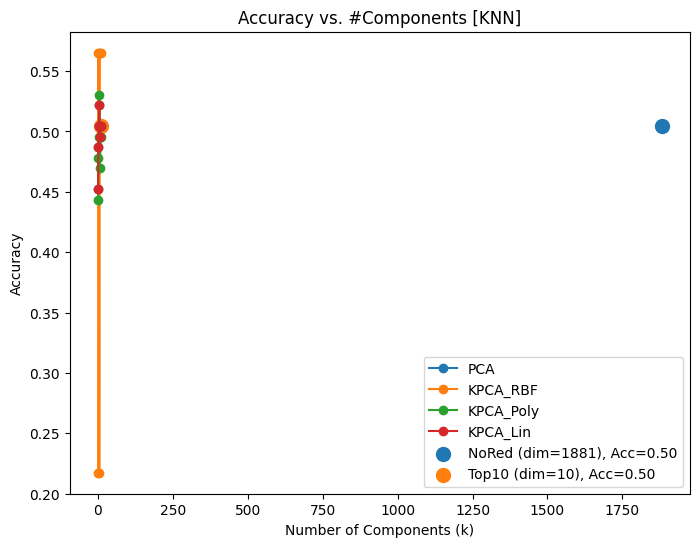

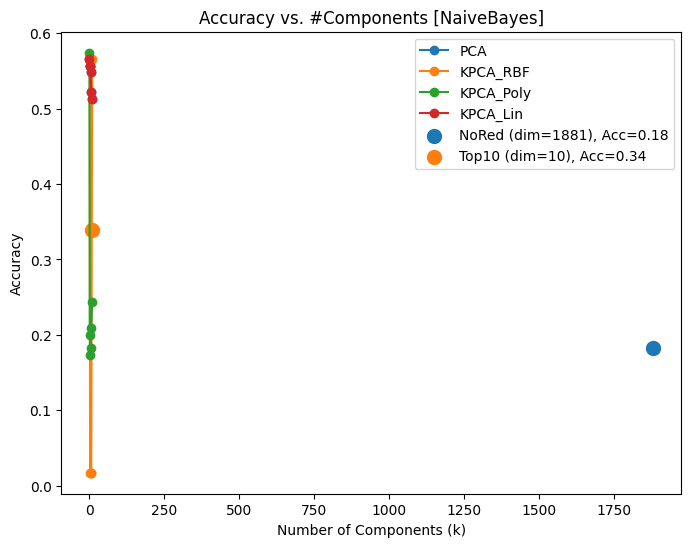


=== Best Results Summary ===
KNN        | NoRed      | k=fixed | Acc=0.5043, Prec=0.4058, Rec=0.5043
KNN        | Top10      | k=fixed | Acc=0.5043, Prec=0.4223, Rec=0.5043
KNN        | PCA        | k=   5 | Acc=0.5217, Prec=0.4606, Rec=0.5217
KNN        | KPCA_RBF   | k=   2 | Acc=0.5652, Prec=0.3195, Rec=0.5652
KNN        | KPCA_Poly  | k=   5 | Acc=0.5304, Prec=0.4615, Rec=0.5304
KNN        | KPCA_Lin   | k=   5 | Acc=0.5217, Prec=0.4606, Rec=0.5217
NaiveBayes | NoRed      | k=fixed | Acc=0.1826, Prec=0.6468, Rec=0.1826
NaiveBayes | Top10      | k=fixed | Acc=0.3391, Prec=0.3831, Rec=0.3391
NaiveBayes | PCA        | k=   1 | Acc=0.5652, Prec=0.3195, Rec=0.5652
NaiveBayes | KPCA_RBF   | k=   1 | Acc=0.5652, Prec=0.3195, Rec=0.5652
NaiveBayes | KPCA_Poly  | k=   1 | Acc=0.5739, Prec=0.4487, Rec=0.5739
NaiveBayes | KPCA_Lin   | k=   1 | Acc=0.5652, Prec=0.3195, Rec=0.5652


In [19]:
## 3.3.3 | 3.3.4 |  3.3.5
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA, KernelPCA


df = pd.read_csv("Thyloid.csv")
X_full = df.iloc[:, :-1].values
y_full = df.iloc[:,  -1].values

X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

print("Full dataset shape:", X_full.shape)
print("Train shape (no reduction):", X_train_full.shape)
print("Test shape (no reduction): ", X_test_full.shape)


# Top 10 features (fixed dimension)

top_10_indices = [285,189,305,352,200,195,1880,26,226,357]
X_top10 = X_full[:, top_10_indices]

X_train_top10, X_test_top10, y_train_top10, y_test_top10 = train_test_split(
    X_top10, y_full, test_size=0.2, random_state=42, stratify=y_full
)
print("Top-10 train:", X_train_top10.shape, "Top-10 test:", X_test_top10.shape)


#  Classifiers to Test

classifiers = {
    "KNN": KNeighborsClassifier(n_neighbors=3),
    "NaiveBayes": GaussianNB(),
    # You could add "MinDist" or "BayesScratch" if desired
}


# D) Dimension-Reduction

def no_reduction_data(X_tr, X_te, k=None):
    return X_tr, X_te

def top10_data(X_tr, X_te, k=None):
    # fixed dimension=10
    return X_tr, X_te

def pca_data(X_tr, X_te, k=2):
    pca_ = PCA(n_components=k)
    X_tr_pca = pca_.fit_transform(X_tr)
    X_te_pca = pca_.transform(X_te)
    return X_tr_pca, X_te_pca

def kpca_data(X_tr, X_te, k=2, kernel="rbf"):
    if kernel == "poly":
        kpca_ = KernelPCA(n_components=k, kernel='poly', degree=3, coef0=1.0)
    elif kernel == "linear":
        kpca_ = KernelPCA(n_components=k, kernel='linear')
    else:
        # RBF default
        kpca_ = KernelPCA(n_components=k, kernel='rbf', gamma=0.001)

    X_tr_kpca = kpca_.fit_transform(X_tr)
    X_te_kpca = kpca_.transform(X_te)
    return X_tr_kpca, X_te_kpca


dim_methods = {
    "NoRed":   (no_reduction_data,   X_train_full, X_test_full, y_train_full, y_test_full),
    "Top10":   (top10_data,         X_train_top10, X_test_top10, y_train_top10, y_test_top10),
    "PCA":     (pca_data,           X_train_full, X_test_full, y_train_full, y_test_full),
    "KPCA_RBF": (kpca_data,         X_train_full, X_test_full, y_train_full, y_test_full),
    "KPCA_Poly":(kpca_data,         X_train_full, X_test_full, y_train_full, y_test_full),
    "KPCA_Lin": (kpca_data,         X_train_full, X_test_full, y_train_full, y_test_full),
}


# E) Loop Over k best components, measure accuracy, precision, recall

k_values = [1, 2, 3, 5, 7, 10]  # adjust as needed


results_for_plot = {}
best_results = []

def evaluate_model(clf, Xtr, ytr, Xte, yte):
    clf.fit(Xtr, ytr)
    ypred = clf.predict(Xte)
    acc = accuracy_score(yte, ypred)
    prec = precision_score(yte, ypred, average='weighted', zero_division=0)
    rec = recall_score(yte, ypred, average='weighted', zero_division=0)
    return acc, prec, rec

for clf_name, clf_obj in classifiers.items():
    print(f"\n=== Classifier: {clf_name} ===")

    for method_name, (dim_fn, Xtr_all, Xte_all, ytr_all, yte_all) in dim_methods.items():

        if method_name in ["NoRed", "Top10"]:
            Xtr_fix, Xte_fix = dim_fn(Xtr_all, Xte_all, k=None)
            acc, prec, rec = evaluate_model(clf_obj, Xtr_fix, ytr_all, Xte_fix, yte_all)

            print(f"  {method_name}: (fixed dimension)  Accuracy={acc:.4f}, Prec={prec:.4f}, Rec={rec:.4f}")
            results_for_plot[(clf_name, method_name)] = [(Xtr_fix.shape[1], acc)]
            best_results.append((clf_name, method_name, "fixed", acc, prec, rec))

        elif method_name == "PCA":
            acc_list = []
            best_k   = None
            best_acc = -1
            best_prec = 0
            best_rec  = 0

            for k_ in k_values:
                Xtr_dim, Xte_dim = dim_fn(Xtr_all, Xte_all, k=k_)
                acc_k, prec_k, rec_k = evaluate_model(clf_obj, Xtr_dim, ytr_all, Xte_dim, yte_all)

                acc_list.append((k_, acc_k))
                if acc_k > best_acc:
                    best_acc = acc_k
                    best_k   = k_
                    best_prec= prec_k
                    best_rec = rec_k

            print(f"  PCA: best_k={best_k}, best_acc={best_acc:.4f} (Prec={best_prec:.4f}, Rec={best_rec:.4f})")
            results_for_plot[(clf_name, method_name)] = acc_list
            best_results.append((clf_name, method_name, best_k, best_acc, best_prec, best_rec))

        elif method_name in ["KPCA_RBF", "KPCA_Poly", "KPCA_Lin"]:
            kernel_mode = "rbf"
            if method_name == "KPCA_Poly":
                kernel_mode = "poly"
            elif method_name == "KPCA_Lin":
                kernel_mode = "linear"

            acc_list = []
            best_k   = None
            best_acc = -1
            best_prec= 0
            best_rec = 0

            for k_ in k_values:
                Xtr_dim = kpca_data(Xtr_all, Xte_all, k=k_, kernel=kernel_mode)[0]
                kpca_ = KernelPCA(n_components=k_, kernel=kernel_mode, gamma=0.001, degree=3, coef0=1.0)
                Xtr_kpca = kpca_.fit_transform(Xtr_all)
                Xte_kpca = kpca_.transform(Xte_all)

                acc_k, prec_k, rec_k = evaluate_model(clf_obj, Xtr_kpca, ytr_all, Xte_kpca, yte_all)

                acc_list.append((k_, acc_k))
                if acc_k > best_acc:
                    best_acc = acc_k
                    best_k   = k_
                    best_prec= prec_k
                    best_rec = rec_k

            print(f"  {method_name}: best_k={best_k}, best_acc={best_acc:.4f} (Prec={best_prec:.4f}, Rec={best_rec:.4f})")
            results_for_plot[(clf_name, method_name)] = acc_list
            best_results.append((clf_name, method_name, best_k, best_acc, best_prec, best_rec))

# Plot "accuracy vs number of components" for each classifier & method
for clf_name, _ in classifiers.items():
    plt.figure(figsize=(8,6))
    plt.title(f"Accuracy vs. #Components [{clf_name}]")
    plt.xlabel("Number of Components (k)")
    plt.ylabel("Accuracy")

    # iter over the dimension methods that actually vary k
    for method_name in ["PCA", "KPCA_RBF", "KPCA_Poly", "KPCA_Lin"]:
        k_acc_list = results_for_plot.get((clf_name, method_name), [])
        if len(k_acc_list) > 0:
            ks = [t[0] for t in k_acc_list]
            accs = [t[1] for t in k_acc_list]
            plt.plot(ks, accs, marker='o', label=method_name)

    for method_name in ["NoRed","Top10"]:
        if (clf_name, method_name) in results_for_plot:
            (k_val, acc_val) = results_for_plot[(clf_name, method_name)][0]
            plt.scatter([k_val],[acc_val], s=100, label=f"{method_name} (dim={k_val}), Acc={acc_val:.2f}")

    plt.legend()
    plt.show()


print("\n=== Best Results Summary ===")
for (clf_n, method_n, best_k, best_acc, best_prec, best_rec) in best_results:
    print(f"{clf_n:10s} | {method_n:10s} | k={str(best_k):>4s} |"
          f" Acc={best_acc:.4f}, Prec={best_prec:.4f}, Rec={best_rec:.4f}")


WORKS CITED

	1.	scikit-learn Documentation – PCA
	•	Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

	2.	scikit-learn Documentation – KernelPCA
	•	Link: https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.KernelPCA.html

	3.	scikit-learn Documentation – Nearest Neighbors and KNN
	•	Link: https://scikit-learn.org/stable/modules/neighbors.html

	4.	scikit-learn Documentation – Naive Bayes
	•	Link: https://scikit-learn.org/stable/modules/naive_bayes.html

	5.	Python Official Documentation
	•	Link: https://docs.python.org/3/

	6.	Numpy Documentation
	•	Link: https://numpy.org/doc/stable/

	7.	pandas Documentation
	•	Link: https://pandas.pydata.org/docs/

	8.	Matplotlib Documentation
	•	Link: https://matplotlib.org/stable/index.html

